In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("penguins_cleaned.csv")

In [4]:
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [44]:
grouped_data = df.groupby(["species", "sex"]).size().reset_index(name='Count')

c:\Users\doguy\anaconda3\Lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


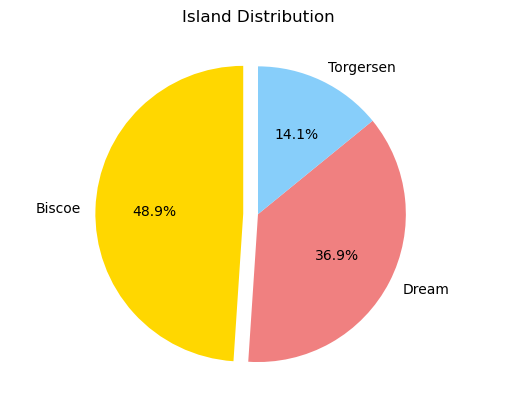

In [63]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
value_counts = df['island'].value_counts()

# Define colors for the pie chart
colors = ['gold', 'lightcoral', 'lightskyblue']

# Create a pie chart with colorful features
fig, ax = plt.subplots()
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Initial explode settings (no separation)
explode = [0.0, 0.0, 0.0]


# Function to update the pie chart with animation
def update(frame):
    ax.clear()
    ax.axis('equal')
    new_explode = [0.1 if i == frame else 0.0 for i in range(len(value_counts))]
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=new_explode)
    ax.set_title('Island Distribution')

# Create an animation
ani = FuncAnimation(fig, update, frames=len(value_counts), repeat=False, interval=1000)

# Save the animation as an HTML file
ani.save('animated_pie_chart.html', writer='html')

# Display the HTML file (you can open it in your web browser)
HTML('animated_pie_chart.html')

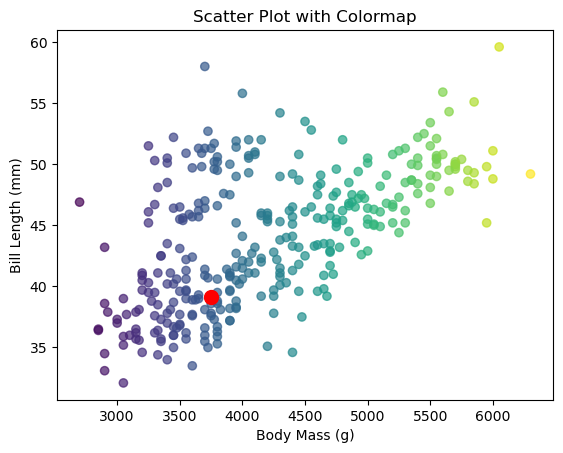

In [65]:
fig, ax = plt.subplots()
sc = ax.scatter(df['body_mass_g'], df['bill_length_mm'], c=df['body_mass_g'], cmap='viridis', alpha=0.7)

# Add labels and title
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Bill Length (mm)')
ax.set_title('Scatter Plot with Colormap')

# Function to update the scatter plot with animation
def update(frame):
    ax.clear()
    ax.set_xlabel('Body Mass (g)')
    ax.set_ylabel('Bill Length (mm)')
    ax.set_title('Scatter Plot with Colormap')
    
    # Update the colormap based on the 'body_mass_g' values
    c = df['body_mass_g']
    
    sc = ax.scatter(df['body_mass_g'], df['bill_length_mm'], c=c, cmap='viridis', alpha=0.7)
    ax.scatter(df['body_mass_g'].iloc[frame], df['bill_length_mm'].iloc[frame], color='red', marker='o', s=100)
    
# Create an animation
ani = FuncAnimation(fig, update, frames=len(df), repeat=False, interval=1000)

# Save the animation as an HTML file
ani.save('animated_scatter_plot.html', writer='html')

HTML('animated_scatter_plot.html')

c:\Users\doguy\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='body_mass_g', ylabel='bill_length_mm'>

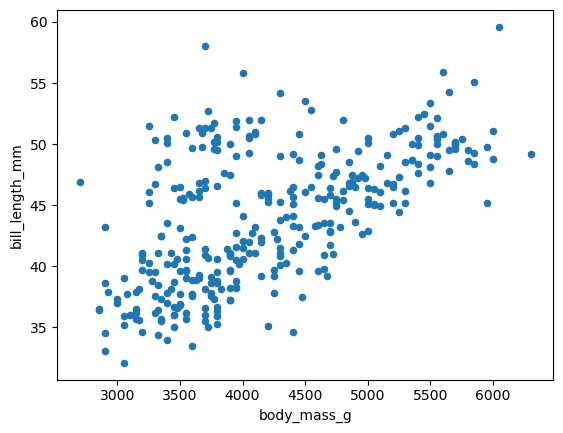

In [20]:
df.plot.scatter(x="body_mass_g", y="bill_length_mm",colormap='viridis')

C:\Users\doguy\AppData\Local\Temp\ipykernel_5656\794949998.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  df.plot.scatter(x="bill_depth_mm", y="bill_length_mm",colormap='viridis', color= "Purple")
c:\Users\doguy\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

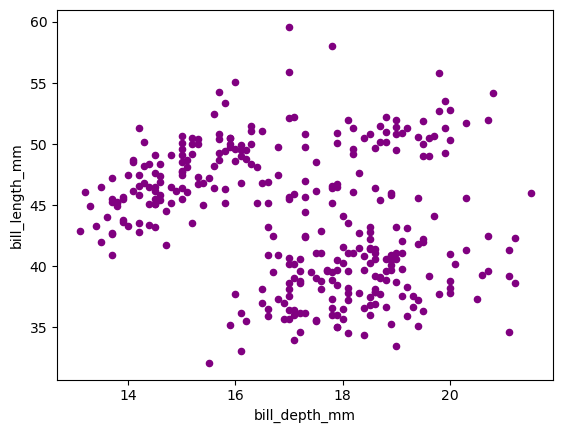

In [23]:
df.plot.scatter(x="bill_depth_mm", y="bill_length_mm",colormap='viridis', color= "Purple")

<Axes: ylabel='Density'>

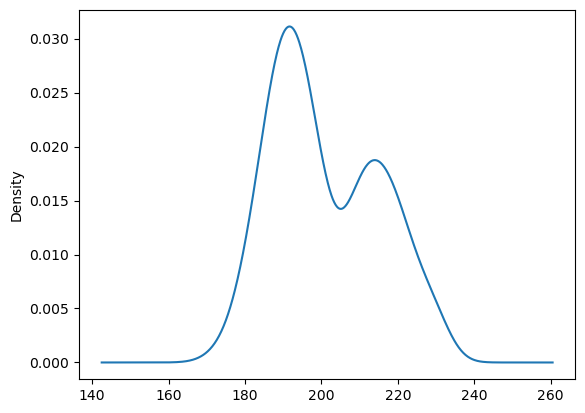

In [26]:
df["flipper_length_mm"].plot.kde()

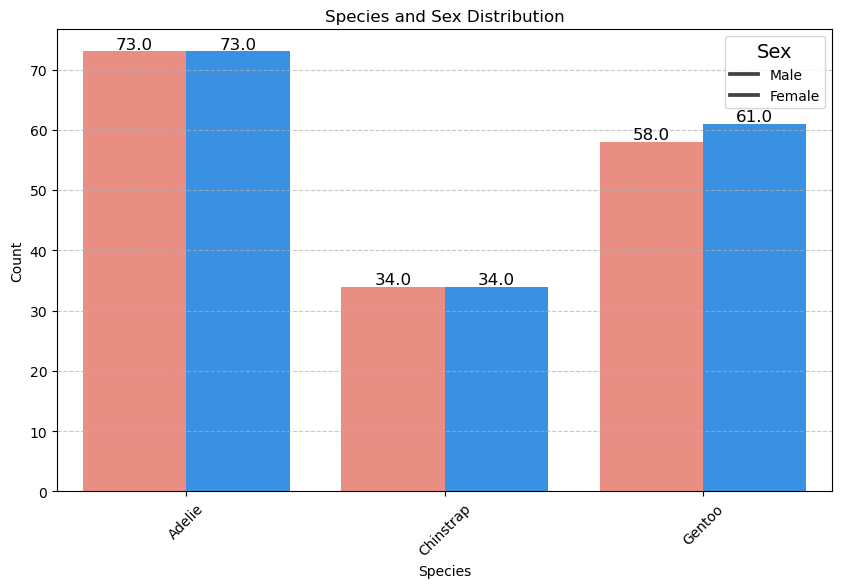

In [78]:
palette = {"male": "dodgerblue", "female": "salmon"}
grouped_data = df.groupby(['species', 'sex']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(x='species', y='Count', hue='sex', data=grouped_data, palette=palette)
plt.title('Species and Sex Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sex', title_fontsize='14', loc='upper right', labels=['Male', 'Female'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with values
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

In [52]:
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


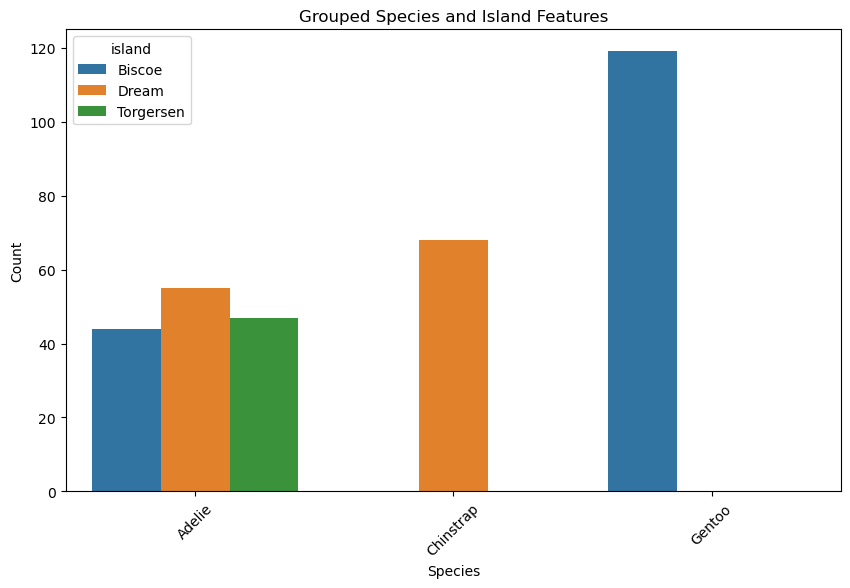

In [77]:
import seaborn as sns
grouped_data = df.groupby(['species', 'island']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(x='species', y='Count', hue='island', data=grouped_data)
plt.title('Grouped Species and Island Features')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()